<a href="https://colab.research.google.com/github/marawayne/git-test/blob/master/util.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
"""Compute daily returns."""

def symbol_to_path(symbol, base_dir="/content/drive/My Drive/ML/mldata/financial"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))



def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='date',
                parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()



In [0]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    dr = df.copy()
    dr[1: ] = (df[1: ] / df[ : -1].values) -1
    dr.iloc[0, :] = 0
    return dr



def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2015-12-31')  # one month only
    symbols = ['SPY','IBM', 'XOM']
    df = get_data(symbols, dates)
    #plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    #plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    daily_returns.plot(kind='scatter', x = 'XOM', y = 'IBM')
    plt.show()
    


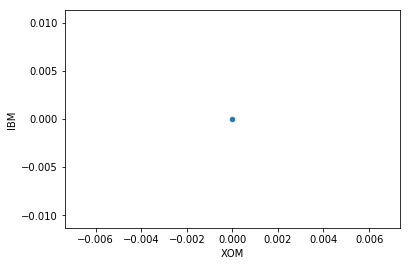

In [0]:
if __name__ == "__main__":
  test_run()